# Decision Trees Assignment
## Company data
A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('ticks')
sns.set_palette('Spectral')

In [133]:
data = pd.read_csv('Company_Data.csv')

##### About the data

Let’s consider a Company dataset with around 10 variables and 400 records.\
The attributes are as follows:
- Sales -- Unit sales (in thousands) at each location
- Competitor Price -- Price charged by competitor at each location
- Income -- Community income level (in thousands of dollars)
- Advertising -- Local advertising budget for company at each location (in thousands of dollars)
- Population -- Population size in region (in thousands)
- Price -- Price company charges for car seats at each site
- Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
- Age -- Average age of the local population
- Education -- Education level at each location
- Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
- US -- A factor with levels No and Yes to indicate whether the store is in the US or not

The company dataset looks like this: 

In [134]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


### Feature Engineering

***Sales*** is our target variable. We have to convert it into categorical variable.

<Axes: xlabel='Sales', ylabel='Count'>

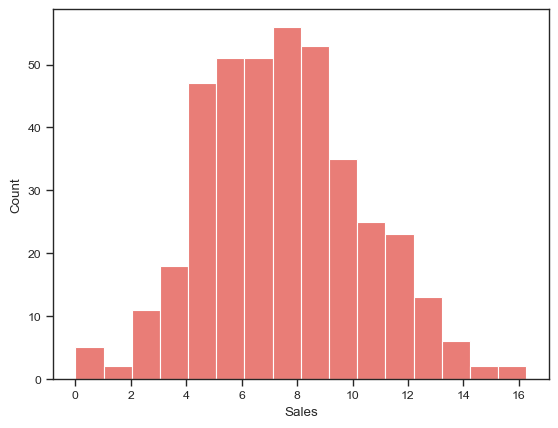

In [136]:
sns.histplot(data['Sales'])

In [137]:
data['Sales'].mean()

7.496325000000001

By investigating ***Sales*** column visually and statistically, we decide our boundary at 7.5\
High Sale (1): Sale>=7.5\
Low Sale (0): Sale<7.5

In [138]:
data['Sales'] = [1 if x>=7.5 else 0 for x in data['Sales']]

In ***Shelvloc*** column, we do label encoding but as in order of quality:\
Good = 2\
Medium = 1\
Bad = 0

In ***Urban*** and ***US*** columns we replace Yes=1 & No=0

In [139]:
data.replace({'Yes':1,'No':0,'Good':2,'Medium':1,'Bad':0}, inplace=True)

In [140]:
data.head(20)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,2,65,10,1,1
2,1,113,35,10,269,80,1,59,12,1,1
3,0,117,100,4,466,97,1,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
5,1,124,113,13,501,72,0,78,16,0,1
6,0,115,105,0,45,108,1,71,15,1,0
7,1,136,81,15,425,120,2,67,10,1,1
8,0,132,110,0,108,124,1,76,10,0,0
9,0,132,113,0,131,124,1,76,17,0,1


### Data Visualization

##### Checking share of high and low sales in target column ***Sales***

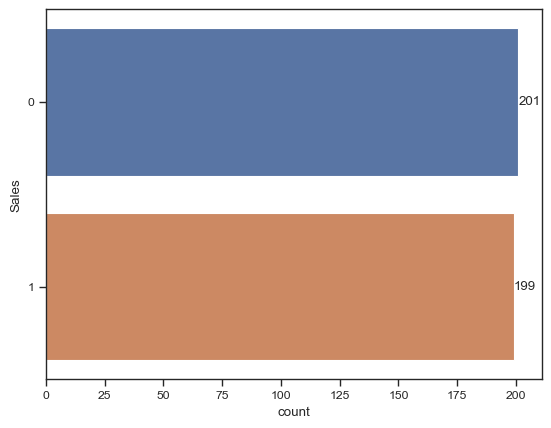

In [141]:
ax = sns.countplot(data=data, y='Sales', palette='deep')
ax.bar_label(ax.containers[0]);

##### Boxplots and Histograms of numerical columns

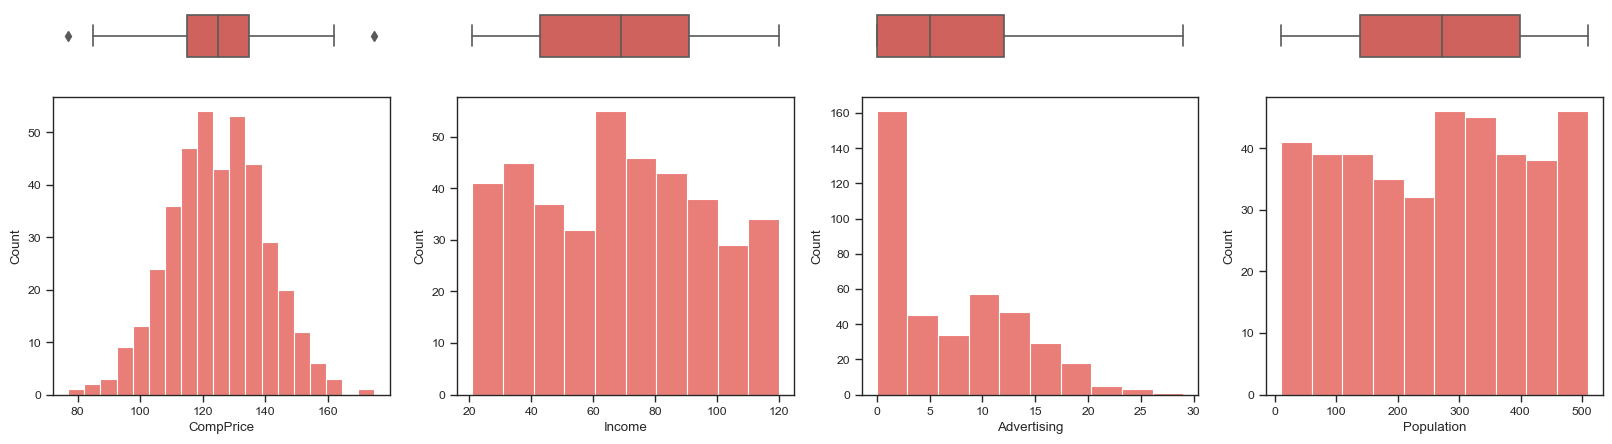

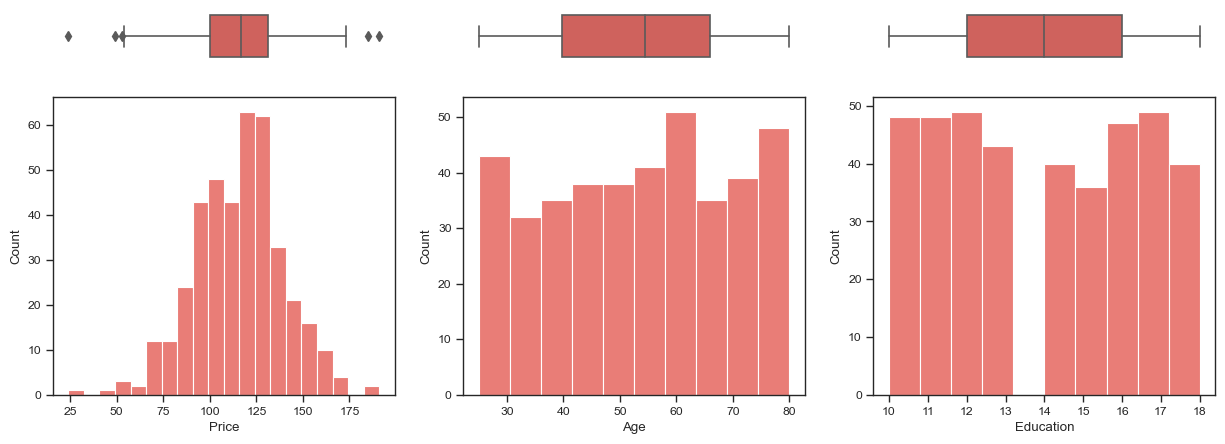

In [142]:
vars1 = ['CompPrice','Income','Advertising','Population']
vars2 = ['Price','Age','Education']

def plotboxhist(vars):
    figs, (ax_box, ax_hist) = plt.subplots(nrows=2, ncols=len(vars), figsize=(5*len(vars),5), gridspec_kw={'height_ratios':(0.15,0.85)})
    for i in range(len(vars)):
        sns.boxplot(data=data, x=vars[i], ax=ax_box[i])
        sns.histplot(data=data, x=vars[i], ax=ax_hist[i])
        sns.despine(ax=ax_box[i], left=True, bottom=True)
        ax_box[i].set_xticks([])
        ax_box[i].set_yticks([])
        ax_box[i].set_xlabel('')
    plt.show()

plotboxhist(vars1)
plotboxhist(vars2)

##### Checking share of categories in categorical variables against sales

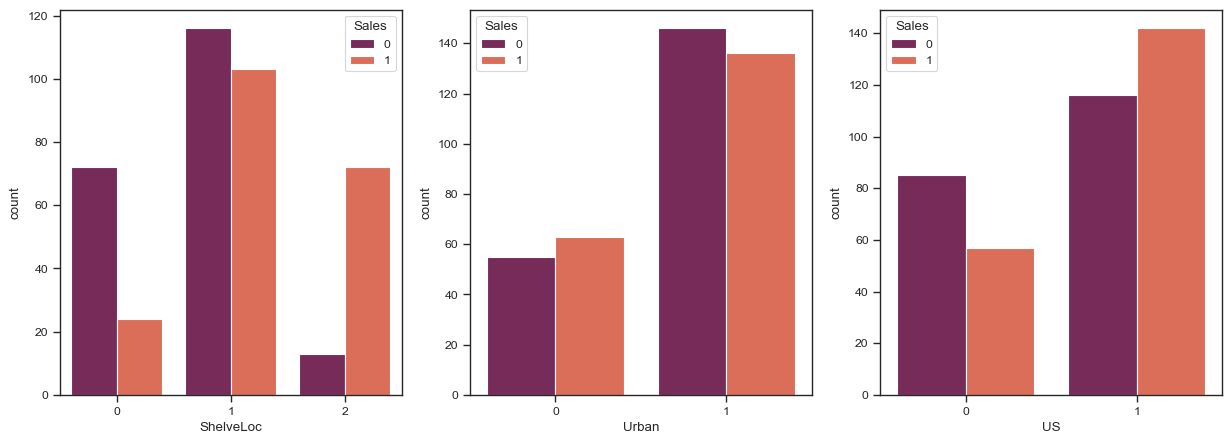

In [143]:
cat_var=['ShelveLoc','Urban','US']

plt.figure(figsize=(15,5)),
for i in range(len(cat_var)):
    plt.subplot(1,3,i+1)
    sns.countplot(data=data, x=cat_var[i], hue='Sales', palette='rocket')

##### Multivariate analysis

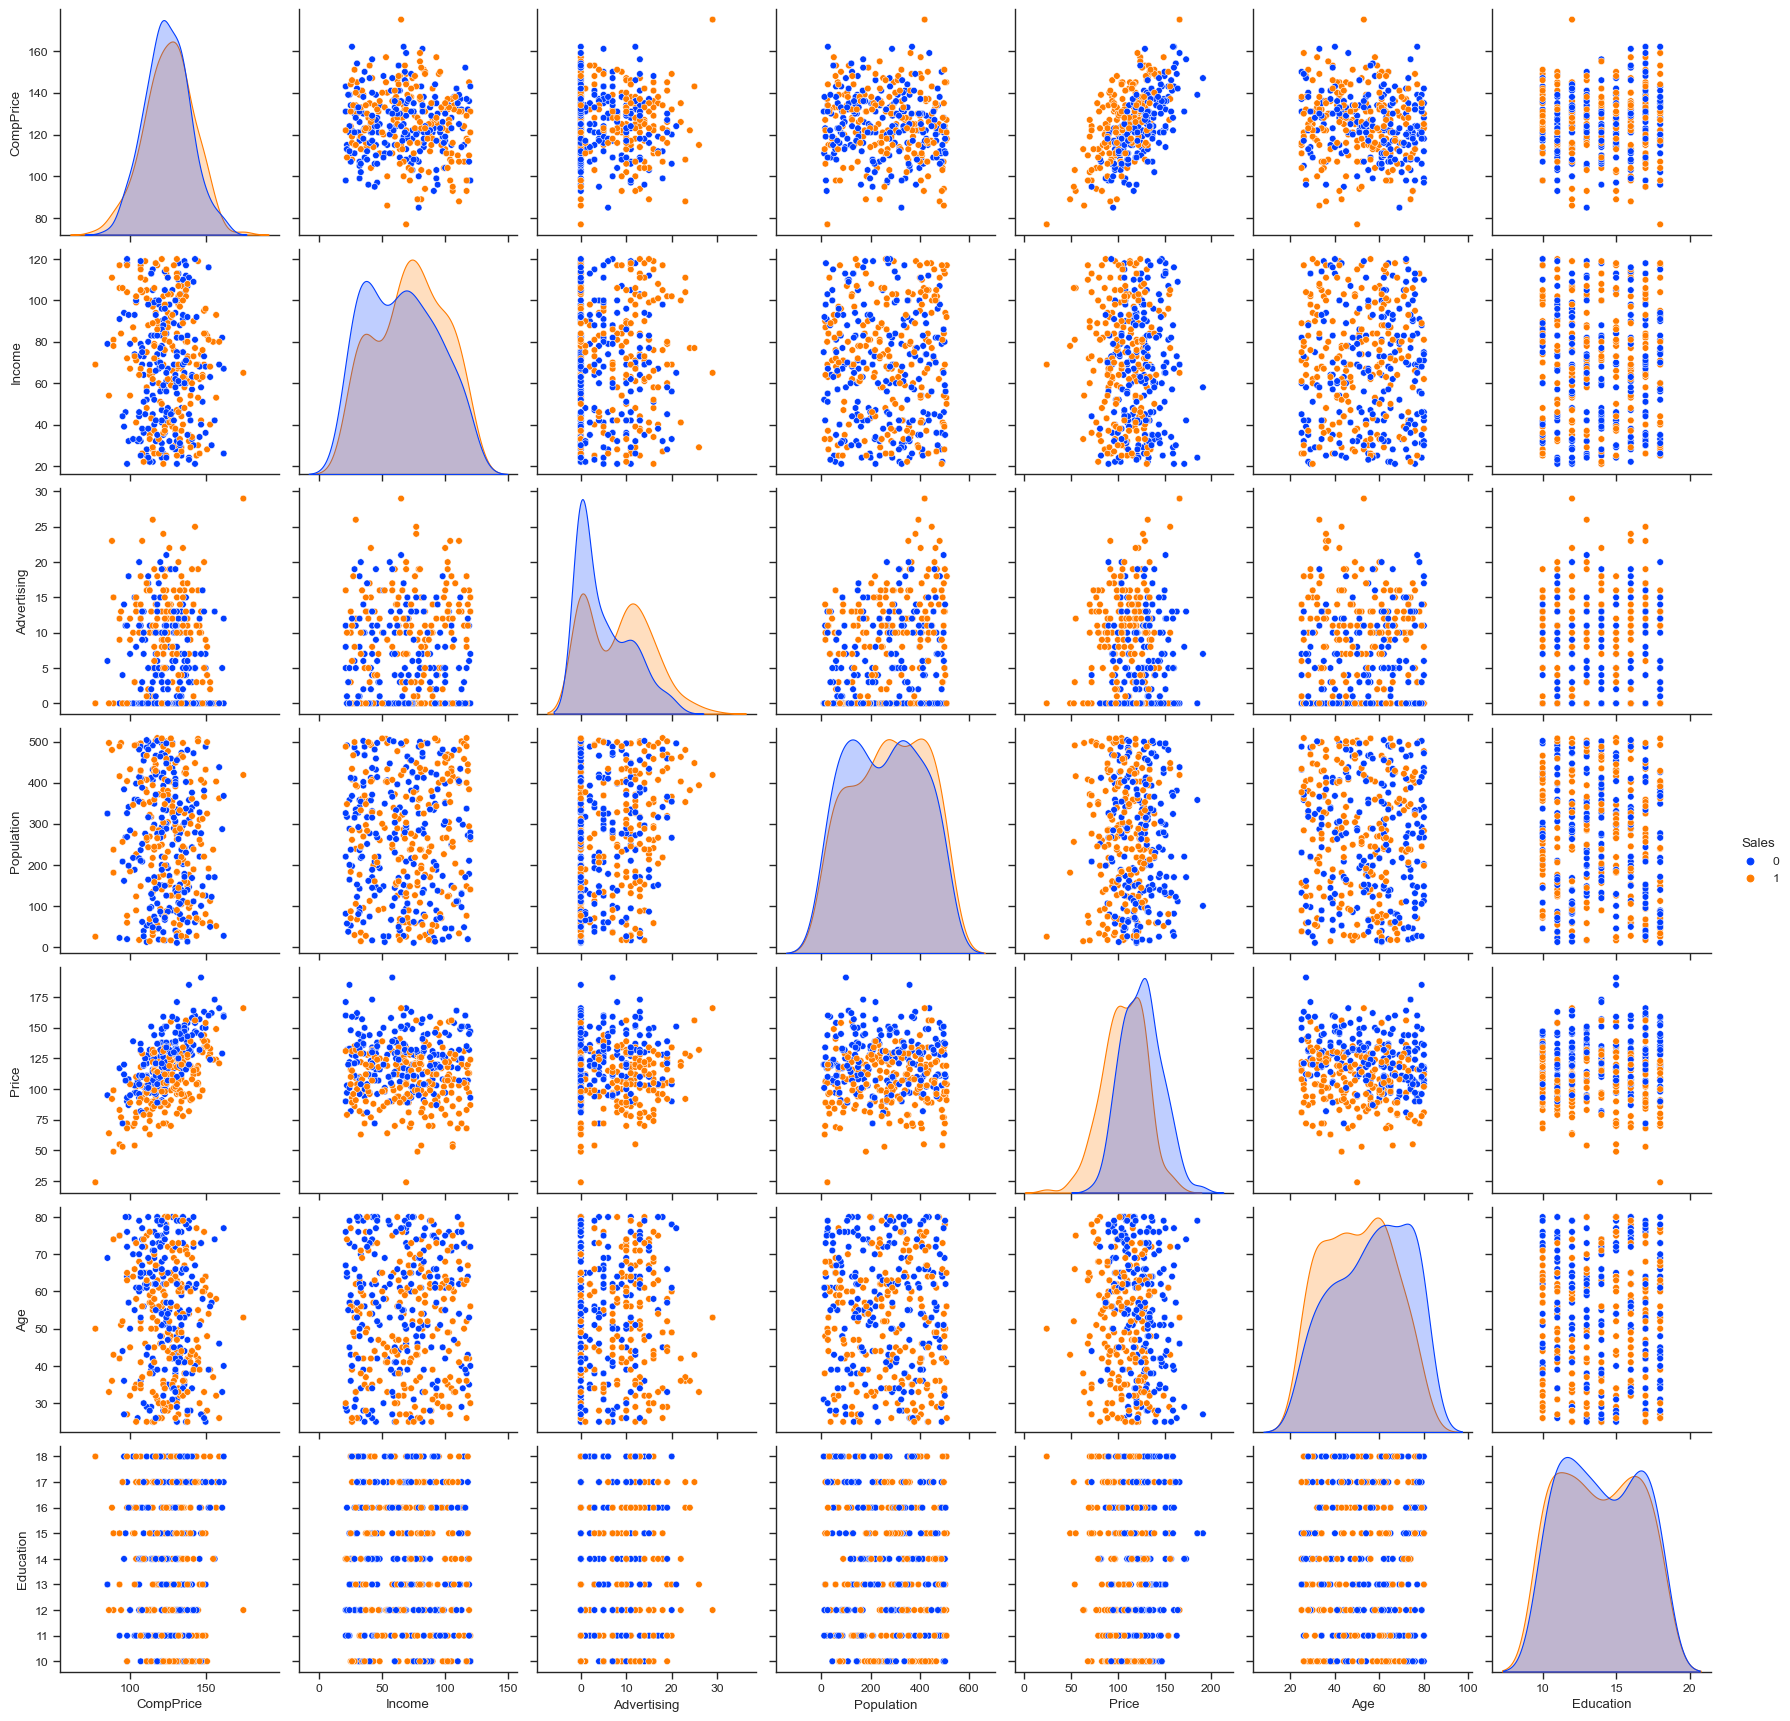

In [161]:
sns.pairplot(data=data.drop(cat_var,axis=1), hue='Sales', palette='bright')

### Preparing data for model

In [144]:
y = data['Sales']
x = data.drop('Sales', axis=1)

In [145]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [146]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### Model Building & Inferences

In [173]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

##### Plotting Tree
The feature in root of tree is ***Price***

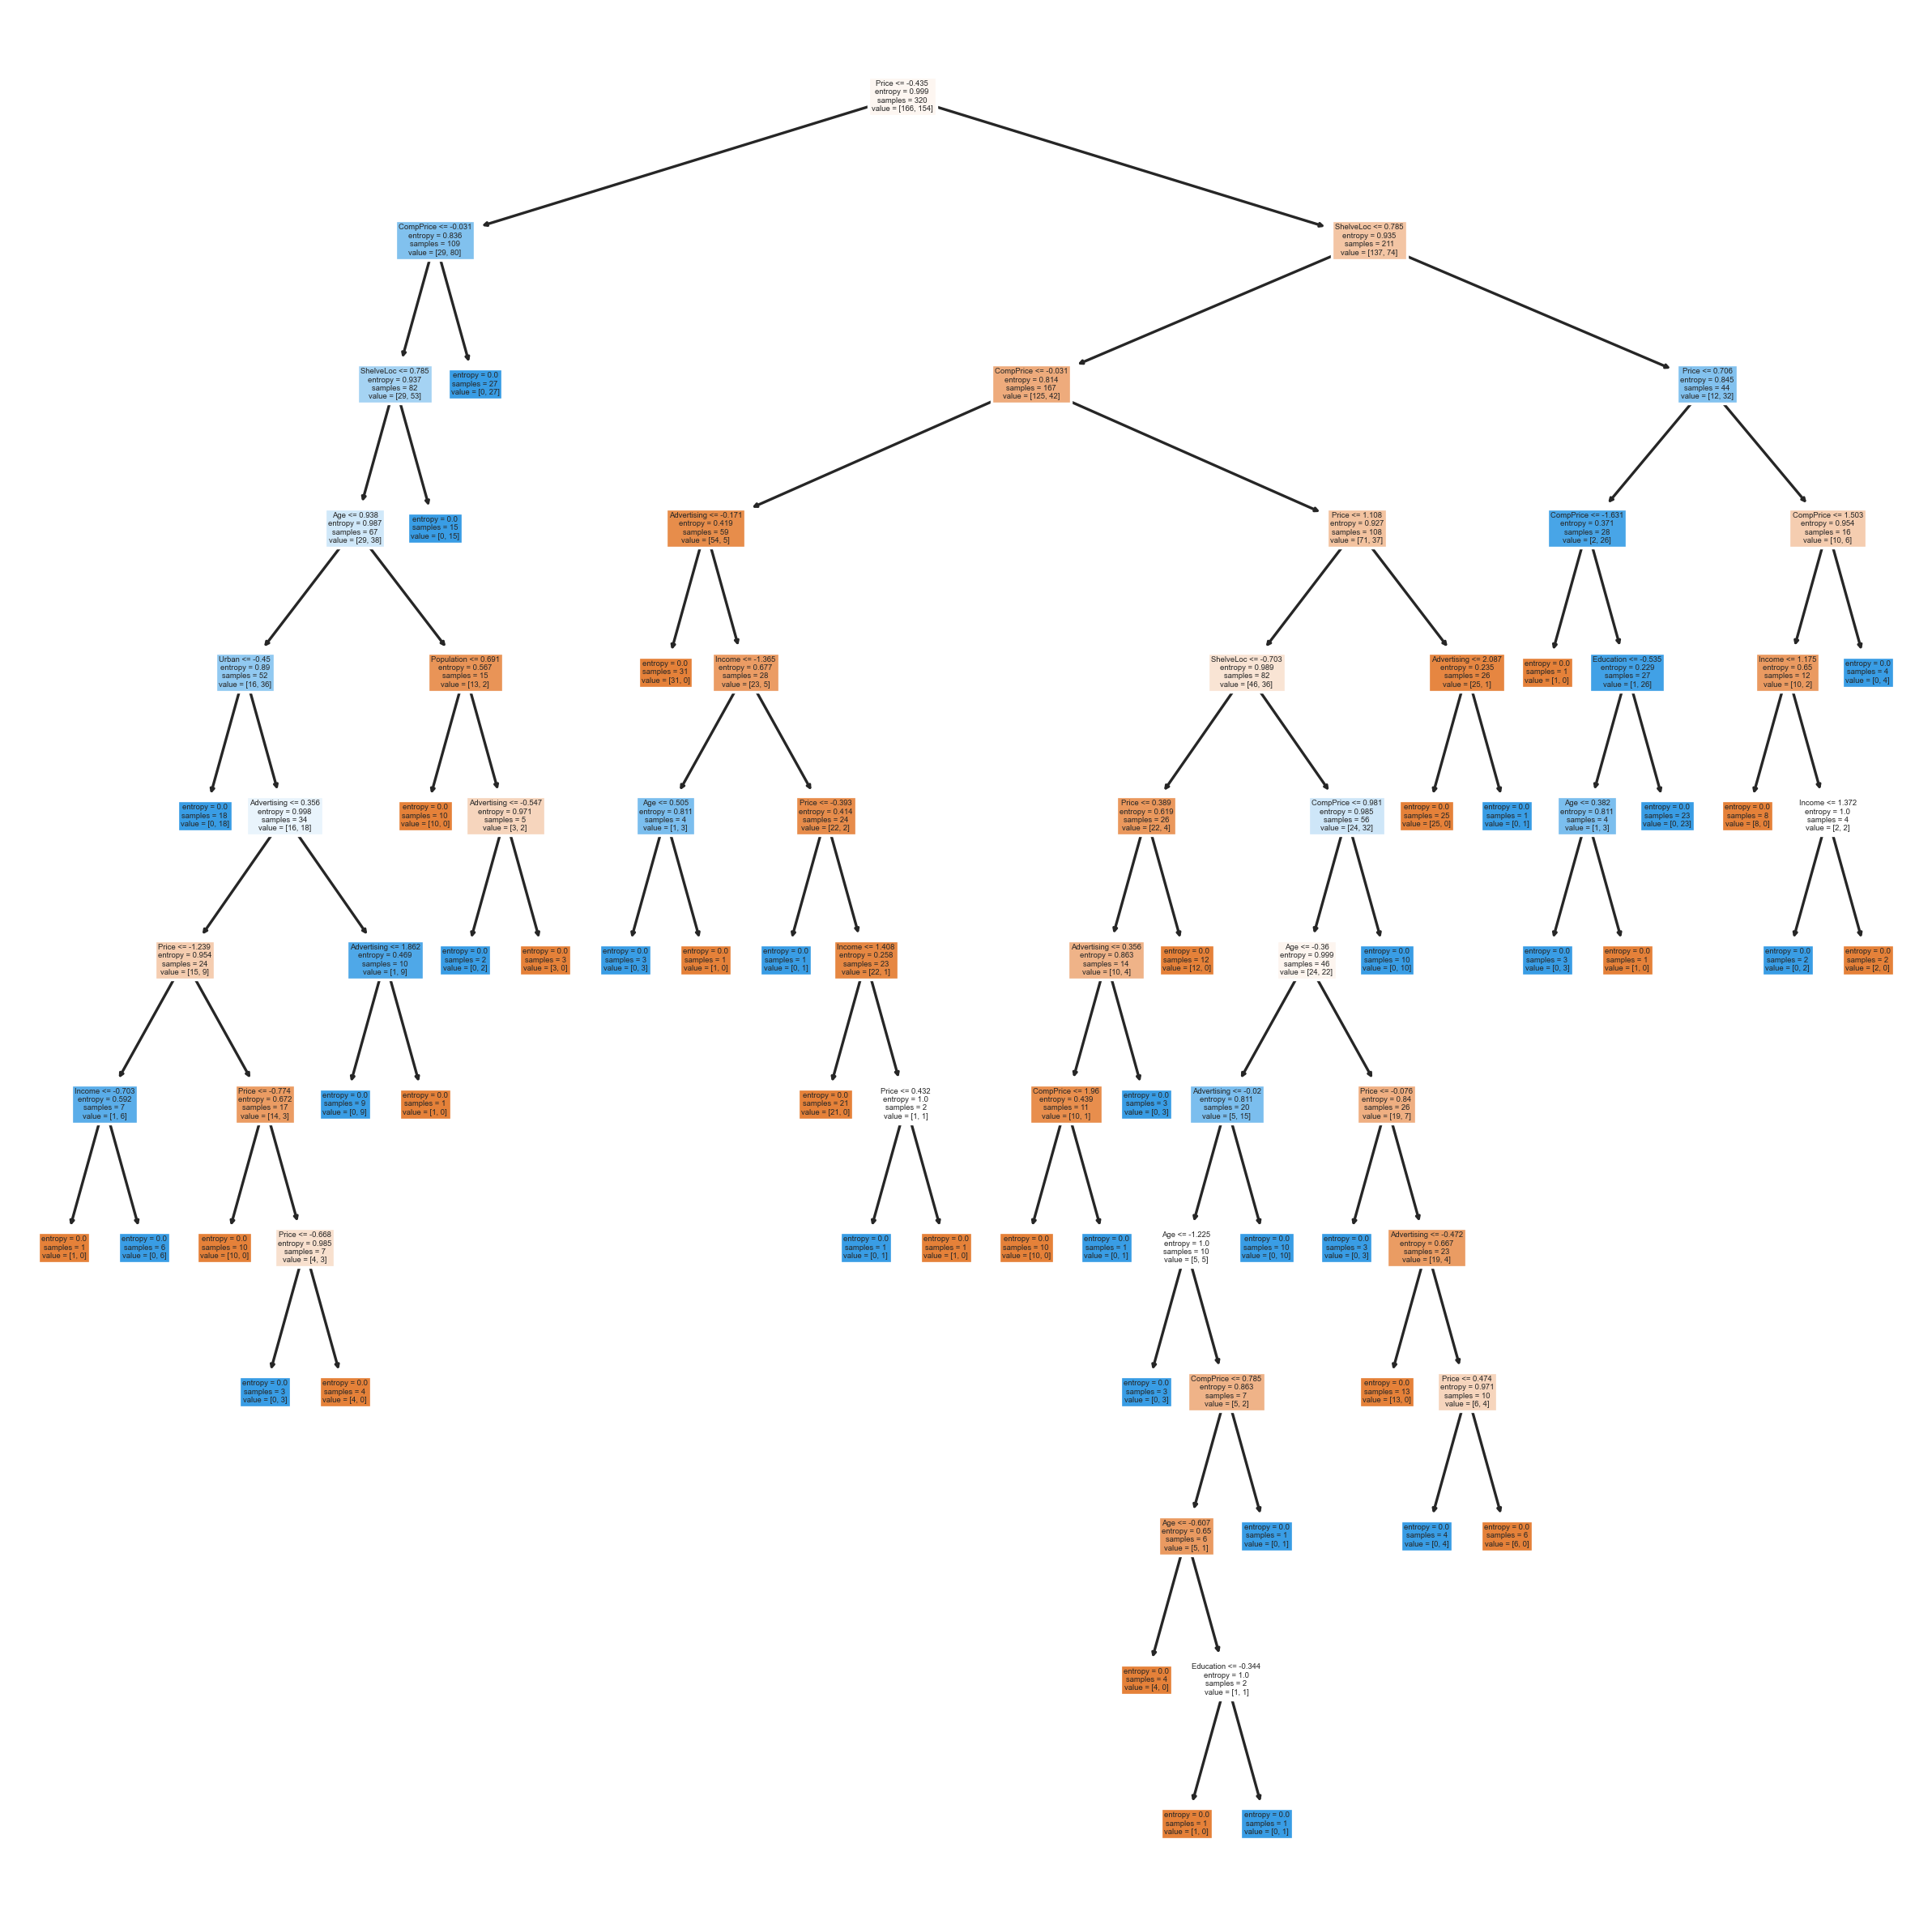

In [189]:
fn = x.columns
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=300)
plot_tree(model,feature_names=fn,filled=True);

We can check importance of all features as following

In [175]:
model.feature_importances_

array([0.16633926, 0.06773768, 0.14647059, 0.01139559, 0.31534958,
       0.13989959, 0.09864057, 0.01540756, 0.03875957, 0.        ])

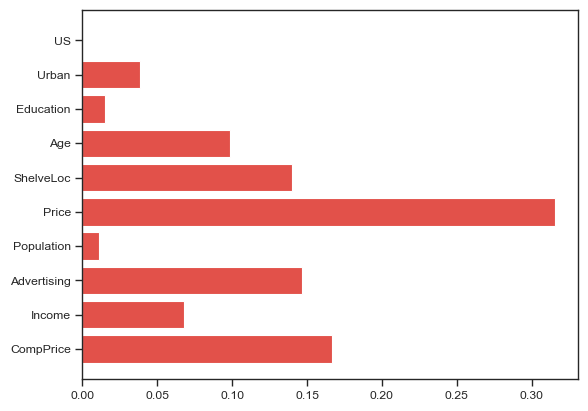

In [176]:
plt.barh(range(10),model.feature_importances_);
plt.yticks(np.arange(10),x.columns);

**From here we can easily see** *Price* **is best feature**

##### Prediction on test data

In [177]:
preds = model.predict(x_test)

Confusion Matrix

In [178]:
pd.crosstab(y_test,preds)

col_0,0,1
Sales,,
0,28,7
1,12,33


Accuracy

In [179]:
np.mean(y_test==preds)

0.7625

Summarizing

In [191]:
from sklearn.metrics import classification_report

print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75        35
           1       0.82      0.73      0.78        45

    accuracy                           0.76        80
   macro avg       0.76      0.77      0.76        80
weighted avg       0.77      0.76      0.76        80

